# Basic analyzing and plotting

This tutorial will go over the basics of analyzing `eggs`, the primary data structure used in `quail`. To learn about how an egg is set up, see the egg tutorial.

An egg is made up of (at minimum) the words presented to a subject and the words recalled by the subject.  With these, two components we can perform a number of analyses:

1. **Recall Accuracy** - the proportion of words presented that were later recalled
2. **Serial Position Curve** - recall accuracy as a function of the encoding position of the word
3. **Probability of First Recall** - the probability that a word will be recalled first as a function of its encoding position
4. **Lag-CRP** - given the recall of word n, the probability of recalling words at neighboring positions (n+/-1, 2, 3 etc).
5. **Temporal Clustering** - a measure of recall clustering by temporal proximity during encoding

If we have a set of features for the stimuli, we can also compute a **Memory Fingerprint**, which is an estimate of how a subject clusters their recall responses with respect to features of a stimulus (see the fingerprint tutorial for more on this).

Let's get to analyzing some `eggs`.  First, we'll load in some example data: 

In [1]:
import quail
egg = quail.load_example_data()

This dataset is comprised of 30 subjects, who each performed 8 study/test blocks of 16 words each.  Here are some of the presented words:

In [2]:
egg.pres.head()

0            1           2          3         4        5   \
Subject List                                                                    
0       0     BROCCOLI  CAULIFLOWER       ONION     PICKLE  STRAINER   SAUCER   
        1       POTATO      CHIMNEY     GERMANY     BLOUSE     EGYPT    LOBBY   
        2         OVEN         TUBA    MONTREAL        MUG       HIP  BROILER   
        3        MOOSE     MICHIGAN  CLEMENTINE   ANTELOPE    MONKEY      RIB   
        4      KITCHEN         ROSE         DOG  CARNATION      BARN   DONKEY   

                   6          7        8            9        10          11  \
Subject List                                                                  
0       0        DISH  BUTTERCUP  GRIDDLE       CARPET    FLOOR  FOUNDATION   
        1      JACKET  ARTICHOKE   CLOSET         SUIT     CUBA      GARLIC   
        2     PICCOLO       ARMS   DALLAS         ROME  TRUMPET      PELVIS   
        3      RACOON    FLORIDA   TONGUE  POMEGRANATE     PEAR        IOWA   
        4       TIGER        EAR     FACE       GAZEBO    HEART     PETUNIA   

                        12          13      14       15  
Subject List                                             
0       0         ELEVATOR      AZALEA  DAHLIA      LOG  
        1         CAMISOLE     SPINACH    IRAN  FURNACE  
        2      THERMOMETER  TAMBOURINE   PARIS  STOMACH  
        3         PANCREAS      KANSAS   LEMON    TOOTH  
        4     HIPPOPOTAMUS      ALCOVE   TULIP  KNUCKLE

and some of the recalled words:

In [3]:
egg.rec.head()

0            1         2             3          4   \
Subject List                                                              
0       0      BROCCOLI  CAULIFLOWER     ONION          DISH    GRIDDLE   
        1       FURNACE      CHIMNEY      CUBA       GERMANY  ARTICHOKE   
        2         MAINE         ARMS     PARIS          None       None   
        3            IS          RIB  PANCREAS    CLEMENTINE      LEMON   
        4     CARNATION         ROSE     TULIP  HIPPOPOTAMUS     ALCOVE   

                   5        6         7       8        9   ...     12    13  \
Subject List                                               ...                
0       0      DAHLIA   SAUCER    AZALEA    None     None  ...   None  None   
        1     SPINACH   POTATO      SUIT  CLOSET  CHIMNEY  ...   None  None   
        2        None     None      None    None     None  ...   None  None   
        3        IOWA  FLORIDA  MICHIGAN   MOOSE   MONKEY  ...   None  None   
        4        None     None      None    None     None  ...   None  None   

                14    15    16    17    18    19    20    21  
Subject List                                                  
0       0     None  None  None  None  None  None  None  None  
        1     None  None  None  None  None  None  None  None  
        2     None  None  None  None  None  None  None  None  
        3     None  None  None  None  None  None  None  None  
        4     None  None  None  None  None  None  None  None  

[5 rows x 22 columns]

We can start with the simplest analysis - recall accuracy - which is just the proportion of words recalled that were in the encoding lists.  To compute accuracy, simply call the `analyze` function, with the `analysis` key word argument set to `accuracy`:

## Recall Accuracy

In [4]:
accuracy = quail.analyze(egg, analysis='accuracy')
accuracy.head()

0
Subject List        
0       0     0.5000
        1     0.5625
        2     0.1250
        3     0.5625
        4     0.3125

The result is a multi-index Pandas DataFrame where the first-level index is the subject identifier and the second level index is the list number.  By default, note that each list is analyzed separately.  However, you can easily return the average over lists using the `listgroup` kew word argument:

In [5]:
accuracy_avg = quail.analyze(egg, analysis='accuracy', listgroup=['average']*8)
accuracy_avg.head()

,,0
Subject,List,
0,average,0.367188
1,average,0.601562
2,average,0.742188
3,average,0.546875
4,average,0.867188


Now, the result is a single value for each subject representing the average accuracy across the 16 lists. The `listgroup` kwarg can also be used to do some fancier groupings, like splitting the data into the first and second half of the experiment:

In [6]:
accuracy_split = quail.analyze(egg, analysis='accuracy', listgroup=['First Half']*4+['Second Half']*4)
accuracy_split.head()

0
Subject List                 
0       Second Half  0.296875
        First Half   0.437500
1       Second Half  0.656250
        First Half   0.546875
2       Second Half  0.750000

These analysis results can be passed directly into the plot function like so:

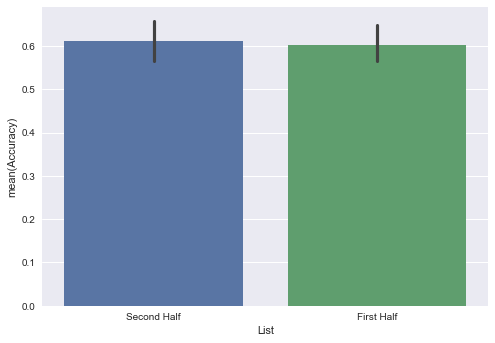

In [7]:
ax = quail.plot(accuracy_split)

For more details on plotting, see the plot tutorial. Next, lets take a look at the serial position curve analysis.  As stated above the serial position curve (or spc) computes recall accuracy as a function of the encoding position of the word.  To use it, use the same `analyze` function illustrated above, but set the `analysis` kwarg to `spc`.  Let's also average across lists within subject:

## Serial Position Curve

In [8]:
spc = quail.analyze(egg, analysis='spc', listgroup=['average']*8)
spc.head()

,,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Subject,List,,,,,,,,,,,,,,,,,,,,,
0,average,0.625,0.625,0.375,0.250,0.250,0.375,0.125,0.375,0.250,0.375,...,0.375,0.625,0.500,0.250,0.0,0.0,0.0,0.0,0.0,0.0
1,average,0.875,0.625,0.375,0.625,0.625,0.625,0.750,0.625,0.375,0.500,...,0.750,0.375,0.625,0.625,0.0,0.0,0.0,0.0,0.0,0.0
2,average,0.875,1.000,0.750,0.875,0.500,0.750,0.625,1.000,0.750,0.625,...,0.875,0.625,0.750,0.625,0.0,0.0,0.0,0.0,0.0,0.0
3,average,0.875,1.000,0.750,0.750,0.625,0.625,0.500,0.500,0.250,0.500,...,0.625,0.375,0.375,0.625,0.0,0.0,0.0,0.0,0.0,0.0
4,average,1.000,1.000,1.000,1.000,0.750,0.875,0.875,0.875,1.000,0.750,...,0.750,0.750,1.000,0.875,0.0,0.0,0.0,0.0,0.0,0.0


The result is a df where each row is a subject and each column is the encoding position of the word. To plot, simply pass the result of the analysis function to the plot function:

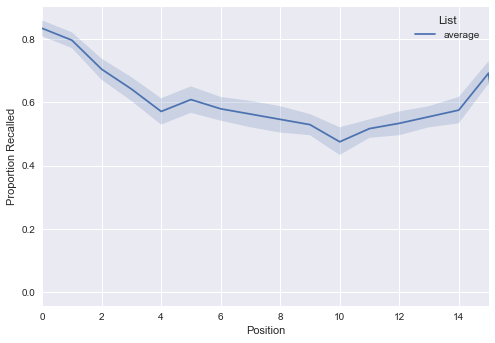

In [9]:
ax = quail.plot(spc)

## Probability of First Recall

The next analysis we'll take a look at is the probability of first recall, which is the probability that a word will be recalled first as a function of its encoding position. To compute this, call the `analyze` function with the `analysis` kwarg set to `pfr`. Again, we'll average over lists:

In [10]:
pfr = quail.analyze(egg, analysis='pfr', listgroup=['average']*8)
pfr.head()

,,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Subject,List,,,,,,,,,,,,,,,,,,,,,
0,average,0.250,0.000,0.000,0.125,0.0,0.0,0.000,0.0,0.0,0.125,...,0.000,0.000,0.000,0.125,0.0,0.0,0.0,0.0,0.0,0.0
1,average,0.250,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.250,0.000,0.375,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,average,0.375,0.000,0.000,0.000,0.0,0.0,0.125,0.0,0.0,0.000,...,0.125,0.125,0.000,0.125,0.0,0.0,0.0,0.0,0.0,0.0
3,average,0.625,0.125,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.000,0.125,0.125,0.0,0.0,0.0,0.0,0.0,0.0
4,average,0.250,0.000,0.125,0.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.375,0.125,0.000,0.125,0.0,0.0,0.0,0.0,0.0,0.0


This df is set up just like the serial position curve.  To plot:

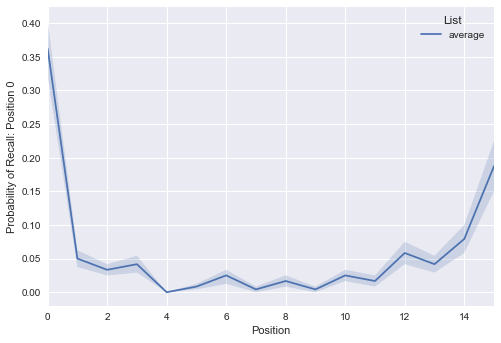

In [11]:
ax = quail.plot(pfr)

## Lag-CRP

The next analysis to consider is the lag-CRP, which again is a function that given the recall of word n, returns the probability of recalling words at neighboring positions (n+/-1, 2, 3 etc). To use it? You guessed it: call the `analyze` function with the `analysis` kwarg set to `lagcrp`:

In [12]:
lagcrp = quail.analyze(egg, analysis='lagcrp', listgroup=['average']*8)
lagcrp.head()

,,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,...,7,8,9,10,11,12,13,14,15,16
Subject,List,,,,,,,,,,,,,,,,,,,,,
0,average,0.0,0.125,0.1250,0.0625,0.000000,0.000000,0.041667,0.062500,0.083333,0.000000,...,0.229167,0.025000,0.083333,0.000000,0.0,0.062500,0.250000,0.0,0.0,0.0
1,average,0.0,0.000,0.0000,0.0000,0.041667,0.000000,0.000000,0.041667,0.087500,0.041667,...,0.041667,0.056250,0.000000,0.062500,0.0,0.104167,0.062500,0.0,0.0,0.0
2,average,0.0,0.125,0.0625,0.0000,0.041667,0.041667,0.000000,0.000000,0.187500,0.000000,...,0.015625,0.077083,0.000000,0.031250,0.0,0.000000,0.000000,0.0,0.0,0.0
3,average,0.0,0.250,0.0000,0.0000,0.000000,0.166667,0.062500,0.062500,0.250000,0.093750,...,0.062500,0.072917,0.092857,0.020833,0.0,0.031250,0.000000,0.0,0.0,0.0
4,average,0.0,0.125,0.1250,0.0000,0.000000,0.000000,0.125000,0.000000,0.000000,0.013889,...,0.013889,0.000000,0.000000,0.000000,0.0,0.000000,0.041667,0.0,0.0,0.0


Unlike the previous two analyses, the result of this analysis returns a df where the number of columns are double the length of the lists.  To view the results:

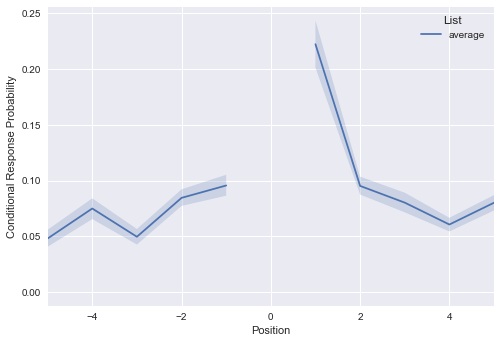

In [13]:
ax=quail.plot(lagcrp)

## Temporal clustering

Another way to evaluate temporal clustering is to measure the temporal distance of each transition made with respect to where on a list the subject could have transitioned.  This 'temporal clustering score' is a good summary of how strongly participants are clustering their responses according to temporal proximity during encoding.

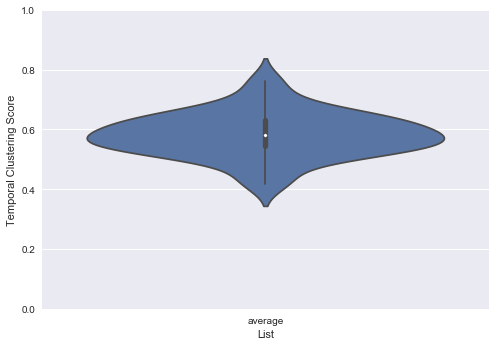

In [14]:
temporal = quail.analyze(egg, analysis='temporal', listgroup=['average']*8)
ax = quail.plot(temporal, plot_style='violin', ylim=[0,1])

## Memory Fingerprint

Last but not least is the memory fingerprint analysis.  For a detailed treatment of this analysis, see the fingerprint tutorial.

As described in the fingerprint tutorial, the `features` data structure is used to estimate how subjects cluster their recall responses with respect to the features of the encoded stimuli.  Briefly, these estimates are derived by computing the similarity of neighboring recall words along each feature dimension.  For example, if you recall "dog", and then the next word you recall is "cat", your clustering by category score would increase because the two recalled words are in the same category.  Similarly, if after you recall "cat" you recall the word "can", your clustering by starting letter score would increase, since both words share the first letter "c".  This logic can be extended to any number of feature dimensions.

To use this analysis function, you'll need to include a `features` field when you create your `egg`.  Our example data has this field included.  For more info on how to create this field, see the egg and fingerprint tutorials.

Here is a glimpse of the features df:

In [15]:
egg.features.head()

0   \
Subject List                                                      
0       0     {u'category': u'VEGETABLES', u'color': [0, 0, ...   
        1     {u'category': u'VEGETABLES', u'color': [0, 0, ...   
        2     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        3     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   
        4     {u'category': u'BUILDING RELATED', u'color': [...   

                                                             1   \
Subject List                                                      
0       0     {u'category': u'VEGETABLES', u'color': [0, 0, ...   
        1     {u'category': u'BUILDING RELATED', u'color': [...   
        2     {u'category': u'INSTRUMENTS', u'color': [0, 0,...   
        3     {u'category': u'STATES', u'color': [0, 0, 0], ...   
        4     {u'category': u'FLOWERS', u'color': [0, 0, 0],...   

                                                             2   \
Subject List                                                      
0       0     {u'category': u'VEGETABLES', u'color': [0, 0, ...   
        1     {u'category': u'COUNTRIES', u'color': [0, 0, 0...   
        2     {u'category': u'CITIES', u'color': [0, 0, 0], ...   
        3     {u'category': u'FRUITS', u'color': [0, 0, 0], ...   
        4     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   

                                                             3   \
Subject List                                                      
0       0     {u'category': u'VEGETABLES', u'color': [0, 0, ...   
        1     {u'category': u'CLOTHING', u'color': [0, 0, 0]...   
        2     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        3     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   
        4     {u'category': u'FLOWERS', u'color': [0, 0, 0],...   

                                                             4   \
Subject List                                                      
0       0     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        1     {u'category': u'COUNTRIES', u'color': [0, 0, 0...   
        2     {u'category': u'BODY PARTS', u'color': [0, 0, ...   
        3     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   
        4     {u'category': u'BUILDING RELATED', u'color': [...   

                                                             5   \
Subject List                                                      
0       0     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        1     {u'category': u'BUILDING RELATED', u'color': [...   
        2     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        3     {u'category': u'BODY PARTS', u'color': [0, 0, ...   
        4     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   

                                                             6   \
Subject List                                                      
0       0     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        1     {u'category': u'CLOTHING', u'color': [0, 0, 0]...   
        2     {u'category': u'INSTRUMENTS', u'color': [0, 0,...   
        3     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   
        4     {u'category': u'MAMMALS', u'color': [0, 0, 0],...   

                                                             7   \
Subject List                                                      
0       0     {u'category': u'FLOWERS', u'color': [0, 0, 0],...   
        1     {u'category': u'VEGETABLES', u'color': [0, 0, ...   
        2     {u'category': u'BODY PARTS', u'color': [0, 0, ...   
        3     {u'category': u'STATES', u'color': [0, 0, 0], ...   
        4     {u'category': u'BODY PARTS', u'color': [0, 0, ...   

                                                             8   \
Subject List                                                      
0       0     {u'category': u'KITCHEN-RELATED', u'color': [0...   
        1     {u'category': u'BUILDING RELATED', u'color': [...   
        2     {u'category': u'CIT

Like the other analyses, computing the memory fingerprint can be done using the `analyze` function with the `analysis` kwarg set to `fingerprint`:

In [16]:
fingerprint = quail.analyze(egg, analysis='fingerprint', listgroup=['average']*8)
fingerprint.head()

,,category,color,location,firstLetter,wordLength,size
Subject,List,,,,,,
0,average,0.587560,0.535778,0.535778,0.536292,0.482460,0.648455
1,average,0.554500,0.541546,0.541546,0.492277,0.522564,0.507837
2,average,0.618258,0.548408,0.548408,0.531006,0.468233,0.601335
3,average,0.558331,0.541722,0.541722,0.501190,0.446369,0.555992
4,average,0.519353,0.560181,0.560181,0.508005,0.498794,0.559776


The result of this analysis is a df, where each row is a subject's fingerprint and each column is a feature dimensions.  The values represent a subjects tendency to cluster their recall responses along a particular feature dimensions.  They are probability values, and thus, greater values indicate more clustering along that feature dimension.  To plot, simply pass the result to the plot function:

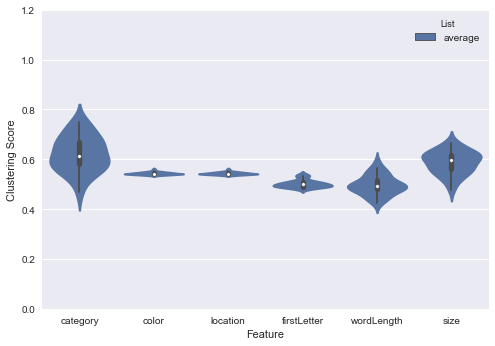

In [17]:
ax = quail.plot(fingerprint, ylim=[0,1.2])

This result suggests that subjects in this example dataset tended to cluster their recall responses by category as well as the size (bigger or smaller than a shoebox) of the word. List length and other properties of your experiment can bias these clustering scores.  To help with this, we implemented a permutation clustering procedure which shuffles the order of each recall list and recomputes the clustering score with respect to that distribution. Note: this also works with the temporal clustering analysis.

In [18]:
# warning: this can take a little while.  Setting parallel=True will help speed up the permutation computation
# fingerprint = quail.analyze(egg, analysis='fingerprint', listgroup=['average']*8, permute=True, n_perms=100)
# ax = quail.plot(fingerprint, ylim=[0,1.2])

Finally, the fingerprint can be plotted along side of the temporal clustering score:

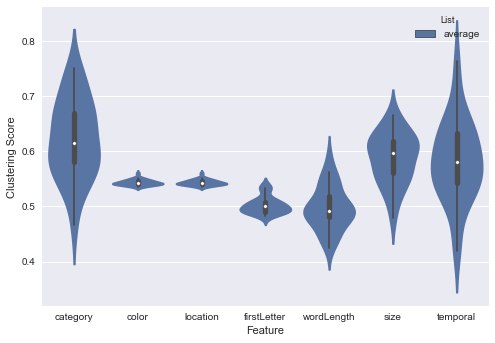

In [19]:
fingerprint_temporal = quail.analyze(egg, analysis='fingerprint_temporal', listgroup=['average']*8)
ax = quail.plot(fingerprint_temporal)